In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
# pip install yfinance --upgrade --no-cache-dir <- 이거 bash terminal 에서 실행
from pandas import DataFrame

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

# 시계열 데이터 불러올 때, 날짜 인덱스로 불러올 때

In [15]:
df=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx")
df.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      127 non-null    object 
 1   종가      127 non-null    int64  
 2   대비      127 non-null    int64  
 3   등락률     127 non-null    float64
 4   시가      127 non-null    int64  
 5   고가      127 non-null    int64  
 6   저가      127 non-null    int64  
 7   거래량     127 non-null    int64  
 8   거래대금    127 non-null    int64  
 9   시가총액    127 non-null    int64  
 10  상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 11.0+ KB


In [17]:
# 일자 type이 object. 날짜 데이터를 아예 인덱스로 불러오기 위해서는, 불러 올 때, index_col = 0 으로 하면 됨.
df2=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      127 non-null    object 
 1   종가      127 non-null    int64  
 2   대비      127 non-null    int64  
 3   등락률     127 non-null    float64
 4   시가      127 non-null    int64  
 5   고가      127 non-null    int64  
 6   저가      127 non-null    int64  
 7   거래량     127 non-null    int64  
 8   거래대금    127 non-null    int64  
 9   시가총액    127 non-null    int64  
 10  상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 11.0+ KB


C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [18]:
df2.head()

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [19]:
df1=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates = ['일자']) 
# 어떤게 날짜인 컬럼인지 알면, 컬럼명 바로 parse_dates로 쓰면 됨ㄹ
df1.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      127 non-null    datetime64[ns]
 1   종가      127 non-null    int64         
 2   대비      127 non-null    int64         
 3   등락률     127 non-null    float64       
 4   시가      127 non-null    int64         
 5   고가      127 non-null    int64         
 6   저가      127 non-null    int64         
 7   거래량     127 non-null    int64         
 8   거래대금    127 non-null    int64         
 9   시가총액    127 non-null    int64         
 10  상장주식수   127 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 11.0 KB


In [21]:
# parse_dates = ['컬럼 명'] : 해당 컬럼이 날짜 형(datetime64[ns])이다. 라는 뜻
# 시계열 자료를 다룰 때는, 기본적으로 datete time으로 날짜 컬럼이 지정 되어 있어야 한다.
# 그럼 위에 자료를 날짜 데이터로 변환해야 한다. 해보자

In [22]:
df2=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", index_col=0)
df2.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [23]:
df2.index = pd.to_datetime(df2.index)
df2.head(1), type(df2.index)
# 날짜 인덱스를 type을 날짜 형으로 바꾸는 것!! (datetime) 

(               종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
 일자                                                                            
 2021-08-13  74400 -2600 -3.38  75800  76000  74100  61270643  4575267536355   
 
                        시가총액       상장주식수  
 일자                                       
 2021-08-13  444151821720000  5969782550  ,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [24]:
#df2['일자'] = pd.to_date()
#df2.info()
# pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=<no_default>, unit=None, infer_datetime_format=<no_default>, origin='unix', cache=True)

In [25]:
df4=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates=['일자'], index_col=0)
df4.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2021-08-13 to 2021-02-15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      127 non-null    int64  
 1   대비      127 non-null    int64  
 2   등락률     127 non-null    float64
 3   시가      127 non-null    int64  
 4   고가      127 non-null    int64  
 5   저가      127 non-null    int64  
 6   거래량     127 non-null    int64  
 7   거래대금    127 non-null    int64  
 8   시가총액    127 non-null    int64  
 9   상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 10.9 KB


In [27]:
type(df4.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [28]:
df4.index

DatetimeIndex(['2021-08-13', '2021-08-12', '2021-08-11', '2021-08-10',
               '2021-08-09', '2021-08-06', '2021-08-05', '2021-08-04',
               '2021-08-03', '2021-08-02',
               ...
               '2021-02-26', '2021-02-25', '2021-02-24', '2021-02-23',
               '2021-02-22', '2021-02-19', '2021-02-18', '2021-02-17',
               '2021-02-16', '2021-02-15'],
              dtype='datetime64[ns]', name='일자', length=127, freq=None)

In [29]:
# 시계열 데이터일 때 이렇게 불러오는 것 매우 권장
# df4=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates=['일자'], index_col=0)

# filter 메서드

In [30]:
from pandas import DataFrame

data = [
    [1416, 1416, 2994, 1755],
    [6.42, 17.63, 21.09, 13.93],
    [1.10, 1.49, 2.06, 1.88]
]

columns = ["2018/12", "2019/12", "2020/12", "2021/12(E)"]
index = ["DPS", "PER", "PBR"]

df = DataFrame(data=data, index=index, columns=columns)
df

,2018/12,2019/12,2020/12,2021/12(E)
DPS,1416.00,1416.00,2994.00,1755.00
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, DPS to PBR
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2018/12     3 non-null      float64
 1   2019/12     3 non-null      float64
 2   2020/12     3 non-null      float64
 3   2021/12(E)  3 non-null      float64
dtypes: float64(4)
memory usage: 120.0+ bytes


In [32]:
df.filter(items=['2018/12'])

,2018/12
DPS,1416.00
PER,6.42
PBR,1.10


In [33]:
df.filter(items=['PER'],axis=0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93


In [34]:
# filter도 행과 열 조회하는 거임. iloc, loc 처럼
# 근데 왜 filter 씀?
# 정규표현식 때문. 
# 정규표현식 활용해서 행과 열을 조회할 수 있음

In [35]:
# 정규 표현식으로 활용해서 행과 열 조회
df.filter(regex='2020')

,2020/12
DPS,2994.00
PER,21.09
PBR,2.06


In [36]:
# 정규표현식 ? 블로그

In [37]:
# 응 뭔가 달라

In [38]:
# 행을 조회할 건데, R이 들어간 것만 조회
df.filter(regex='R', axis = 0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [39]:
# 행을 조회할 건데, R로 끝나는 모든 패턴을 조회
df.filter(regex='R$', axis = 0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [40]:
# 정규표현식 사용하면 원하는 행과 열 뽑아 낼 수 있음
# ex) 카드 명이 상품ㅁ명 수천개인데, 다 텍스트임. 근데 그 네임ㅇ에 원칙이 있음. 그러면 키워드로 원하는 행 뽑아 낼 수 있음.


# dd

In [41]:
data = [
    ["037730", "3R", 1510],
    ["036360", "3SOFT", 1790],
    ["005670", "ACTS", 1185]
]

columns = ["종목코드", "종목명", "현재가"]
df = DataFrame(data=data, columns=columns)
df.set_index("종목코드", inplace=True)
print(df)

          종목명   현재가
종목코드               
037730     3R  1510
036360  3SOFT  1790
005670   ACTS  1185


# 정렬하기
## .sort_values

In [42]:
df.sort_values(by='현재가')
print(df.sort_values(by='현재가'))
# 현재가 컬럼 기준으로 정렬

          종목명   현재가
종목코드               
005670   ACTS  1185
037730     3R  1510
036360  3SOFT  1790


## , ascending=False: 내림차순

In [43]:
# ascending=False : 내림차순 , = True 가 기본 값= 오름차순
print(df.sort_values(by='현재가',ascending=False))
print(df.sort_values(by='종목명',ascending=False))

          종목명   현재가
종목코드               
036360  3SOFT  1790
037730     3R  1510
005670   ACTS  1185
          종목명   현재가
종목코드               
005670   ACTS  1185
036360  3SOFT  1790
037730     3R  1510


## .sort_index()

In [44]:
df.index

Index(['037730', '036360', '005670'], dtype='object', name='종목코드')

In [45]:
print(df.sort_index()) # 기본값
print(df.sort_index(ascending=False)) # 역순

          종목명   현재가
종목코드               
005670   ACTS  1185
036360  3SOFT  1790
037730     3R  1510
          종목명   현재가
종목코드               
037730     3R  1510
036360  3SOFT  1790
005670   ACTS  1185


# 인덱스 연산
- 집합 연산 개념이 들어가 있음. 이를 통해 데이터 병합할 때 사용
## union: 합집합

In [46]:
# 인덱스 연산:
idx1=pd.Index([1, 2, 3])
idx2=pd.Index([2,3,4])
print(idx1.union(idx2))

Index([1, 2, 3, 4], dtype='int64')


## intersection : 교집합

In [47]:
print(idx1.intersection(idx2))

Index([2, 3], dtype='int64')


## difference : 차집합

In [48]:
print(idx1.difference(idx2))

Index([1], dtype='int64')


# Groupby 연산
- 참고: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- 연습할 것: https://pandas.pydata.org/docs/user_guide/timeseries.html


In [49]:
data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]

columns = ["테마", "종목명", "PER", "PBR"]
df = DataFrame(data=data, columns=columns)
print(df)


         테마      종목명    PER   PBR
0  2차전지(생산)  SK이노베이션  10.19  1.29
1        해운      팬오션  21.23  0.95
2    시스템반도체     티엘아이  35.97  1.12
3        해운      HMM  21.52  3.20
4    시스템반도체     아이에이  37.32  3.55
5  2차전지(생산)     LG화학  83.06  3.75


In [50]:
# groupby 해보기
result = df.groupby("테마")[["PER","PBR"]]
print(result)
print(type(result))
df

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
1,해운,팬오션,21.23,0.95
2,시스템반도체,티엘아이,35.97,1.12
3,해운,HMM,21.52,3.20
4,시스템반도체,아이에이,37.32,3.55
5,2차전지(생산),LG화학,83.06,3.75


In [51]:
# result = df.groupby("테마")[["PER","PBR"]]
# 얘는 어떻게 나오는거지...
# 암튼 넘어가자
# group by 연산 연습 할 때 이해해보자

In [52]:
result2 = df.groupby("테마")[["PER","PBR"]].mean()
print(result2)
print(type(result2))

             PER    PBR
테마                     
2차전지(생산)  46.625  2.520
시스템반도체    36.645  2.335
해운        21.375  2.075
<class 'pandas.core.frame.DataFrame'>


In [53]:
# 요기까지가 분석해야할 테이블. 그걸 한번 본것. 나중에는 굉장히 데이터가 커짐
# 그래서 group by 가 중요

## .get_group
- get_group : 테마로 그룹화한 것 안에서 쪼개

In [54]:
print(df.groupby("테마").get_group("2차전지(생산)"))
print(df.groupby("테마").get_group("시스템반도체"))
print(df.groupby("테마").get_group("해운"))

         테마      종목명    PER   PBR
0  2차전지(생산)  SK이노베이션  10.19  1.29
5  2차전지(생산)     LG화학  83.06  3.75
       테마   종목명    PER   PBR
2  시스템반도체  티엘아이  35.97  1.12
4  시스템반도체  아이에이  37.32  3.55
   테마  종목명    PER   PBR
1  해운  팬오션  21.23  0.95
3  해운  HMM  21.52  3.20


In [55]:
df.groupby("테마").get_group("2차전지(생산)")

,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
5,2차전지(생산),LG화학,83.06,3.75


In [56]:
df.groupby("테마").get_group("시스템반도체")

,테마,종목명,PER,PBR
2,시스템반도체,티엘아이,35.97,1.12
4,시스템반도체,아이에이,37.32,3.55


In [57]:
df.groupby("테마").get_group("해운")

,테마,종목명,PER,PBR
1,해운,팬오션,21.23,0.95
3,해운,HMM,21.52,3.20


In [58]:
# 얘를 내보내야함. 그게 문제. <- vs code 서서

In [59]:
# result = df.groupby("테마")[["PER","PBR"]].mean()
# result.to_csv("c:/Archiving/IMDGB/20241004/output/result_csv_240930.xlsx")
# 오 된다. 왜 그래프는 안되지 <- vs code 에서

## Groupby 심화

In [60]:
df = pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx" , parse_dates=['일자'], index_col=0)
print(df.head())

               종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
일자                                                                            
2021-08-13  74400 -2600 -3.38  75800  76000  74100  61270643  4575267536355   
2021-08-12  77000 -1500 -1.91  77100  78200  76900  42365223  3276635421700   
2021-08-11  78500 -1700 -2.12  79600  79800  78500  30241137  2389977254924   
2021-08-10  80200 -1300 -1.60  82300  82400  80100  20362639  1643107615500   
2021-08-09  81500     0  0.00  81500  82300  80900  15522581  1267668377900   

                       시가총액       상장주식수  
일자                                       
2021-08-13  444151821720000  5969782550  
2021-08-12  459673256350000  5969782550  
2021-08-11  468627930175000  5969782550  
2021-08-10  478776560510000  5969782550  
2021-08-09  486537277825000  5969782550  


C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [61]:
df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550


In [62]:

# 이런 파일 가져오면, 연도/월/일로 쪼개서 관리할 수 있다.
df = df.reset_index()
#print(df.head(1))
#print(df.info())
# print(df['일자'].dt.quarter) # 분기 정보가 나온다
# print(df['일자'].dt.year) # 연 정보가 나온다
# print(df['일자'].dt.month) # 월 정보가 나온다
# print(df['일자'].dt.day) # 일 정보가 나온다


In [63]:
# 여기서부터 시작

# plotly 시각화 연습 

In [64]:
import plotly

plotly.__version__

'5.24.1'

In [65]:
import plotly.graph_objects as go #matplotlib 와 개념 유사

In [66]:
fig = go.Figure()

# 기본적인 자료형은 list를 참조함
fig.add_trace(go.Bar(x=[1,2,3],y=[1,5,3]))

fig.show()

In [67]:
import plotly.express as px # seaborn과 개념적으로 유사

In [68]:
iris = px.data.iris()
# iris.head()

# pandas dataframe이랑 seaborn 바로 연결됨. 얘도 그럼.. <- ㅔ? -> 아하, 바로 data = iris, x=, y=로 쓸 수 있따. ㅇㅋ

fig = px.scatter(iris, x='sepal_length', y='sepal_width')

fig.show()

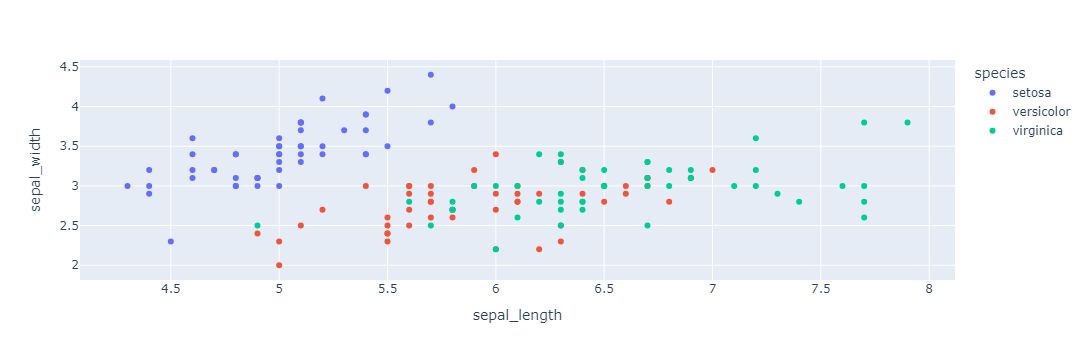

In [69]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')
fig.show()

In [73]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')

fig.add_trace(
    go.Scatter( 
        x = [4.5, 7.5], # line 그리려고
        y = [4, 2],
        mode = "lines",
        line = go.scatter.line(color = 'red'),
        showlegend=False
    )
)
fig.show()

AttributeError: module 'plotly.graph_objs.scatter' has no attribute 'line'

In [71]:
# d왜 안나오지

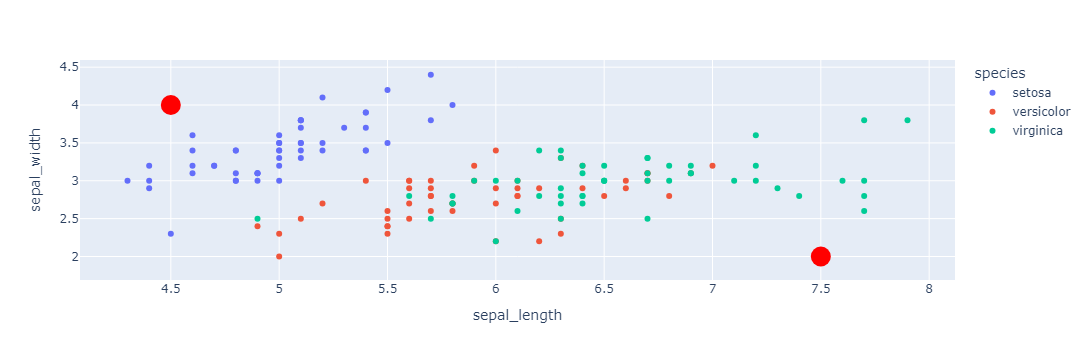

In [72]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')

fig.add_trace(
    go.Scatter( 
        x = [4.5, 7.5], # line 그리려고
        y = [4, 2],
        mode = "markers",
        marker=dict(size=20, color='red'),
        showlegend=False
    )
)
fig.show()

In [74]:
# 위가 전형적인 plotly 시각화 문법 구조